In [91]:
import random
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import pandas as pd

In [92]:
%run ./func.ipynb

In [93]:
seed = "2234313259"

In [94]:
D, J = 100,100

# a side of the site
num_rows_columns = 50

alpha = 0
beta = 0.01

p = 2
r = 2

h_i = np.full(D, 1 / D)

# 既存のリーダーの施設セット J_L を仮定
J_L = {}  # インデックスとして候補施設の一部を選択
J_F = {}

fix_seed = False
eta = 0.01
mu = 0.05

max_iter = 500_000
tau_interval = 10000

In [95]:
seed_int = int(seed)
path = f"history/history_seed_{seed_int}_eta_{eta}_mu_{mu}_iter_{max_iter}_tau_{tau_interval}_exp.npz"

data = np.load(path)
history = {k: data[k] for k in data.files}

In [96]:
demand_points = history["demand_points"] 
candidate_sites = history["candidate_sites"]

In [97]:
n = tau_interval * 40

In [98]:
def safe_slice_history(history, n):
    if n is None:
        return history

    if isinstance(history, dict):
        sliced = {}
        for k, v in history.items():
            try:
                sliced[k] = v[:n]
            except Exception:
                sliced[k] = v
        return sliced

    # list / np.array / pandas series など
    try:
        return history[:n]
    except Exception:
        return history

sliced_history = safe_slice_history(history, n)

In [99]:
gap_res = gap_from_history(
    sliced_history,
    p=p, r=r, h=h_i,
    demand_points=demand_points,
    candidate_sites=candidate_sites,
    alpha=alpha, beta=beta,
    J_L=J_L, J_F=J_F,       # ← これで Ui_L/Ui_F も作る
    stride=5000,
    br_step=0.5,
    br_iters=200
)

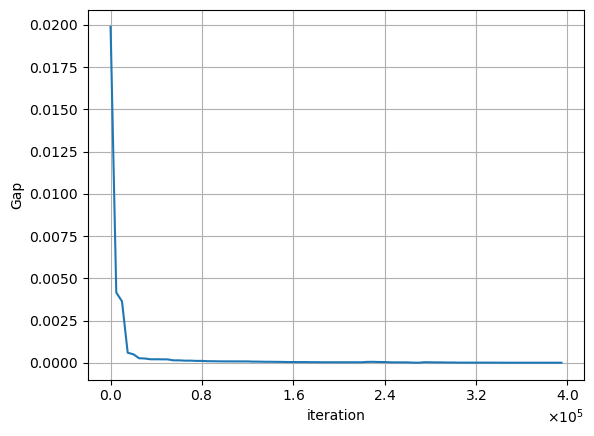

In [100]:
plot_gap(gap_res)

In [101]:
def safe_slice_history(history, n):
    if n is None:
        return history

    if isinstance(history, dict):
        sliced = {}
        for k, v in history.items():
            try:
                sliced[k] = v[:n]
            except Exception:
                sliced[k] = v
        return sliced

    # list / np.array / pandas series など
    try:
        return history[:n]
    except Exception:
        return history

sliced_history = safe_slice_history(history, max_iter)

save pic: fig/lgda_exp1_seed_2234313259_eta_0.01_mu_0.05_iter_500000_tau_10000_400000_objective.png


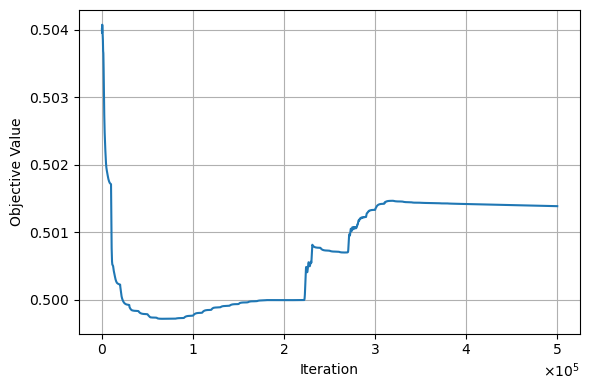

save pic: fig/lgda_exp1_seed_2234313259_eta_0.01_mu_0.05_iter_500000_tau_10000_400000_dx.png


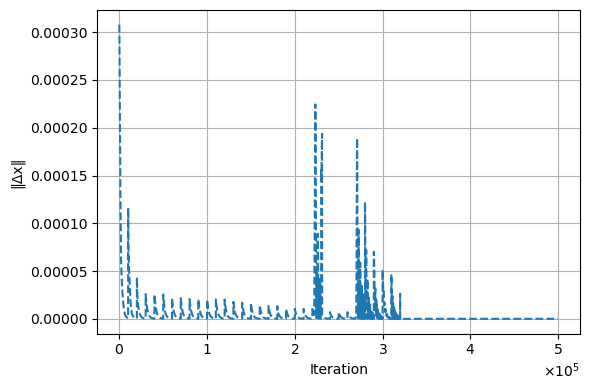

save pic: fig/lgda_exp1_seed_2234313259_eta_0.01_mu_0.05_iter_500000_tau_10000_400000_dy.png


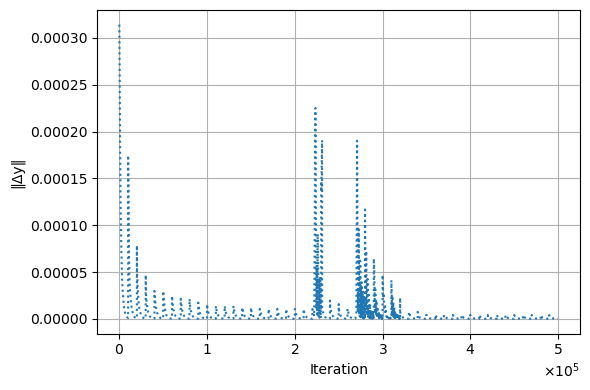

save pic: fig/lgda_exp1_seed_2234313259_eta_0.01_mu_0.05_iter_500000_tau_10000_400000_lambda_summary.png


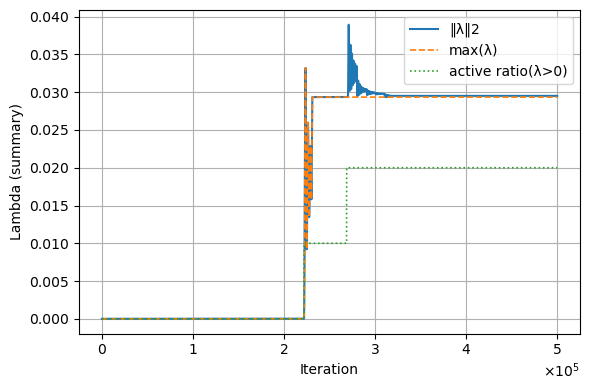

save pic: fig/lgda_exp1_seed_2234313259_eta_0.01_mu_0.05_iter_500000_tau_10000_400000_violation.png


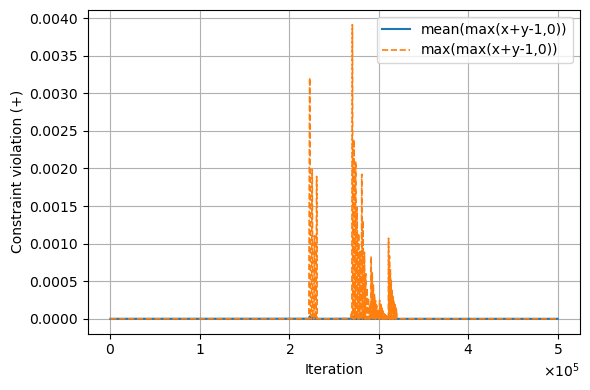

In [102]:
plot_each_history_component_separately(
    sliced_history,
    logy=False,
    fix_seed=False,          # ランダムに実験したいなら False（固定したいなら True）
    save=True,
    save_prefix=f"fig/lgda_exp1_seed_{seed}_eta_{eta}_mu_{mu}_iter_{max_iter}_tau_{tau_interval}_{n}",   # lgda_exp1_1000_objective.png など
    save_ext="png",
)